## K-Means Clustering 

In [113]:
from sklearn.datasets import make_blobs  # importing data set from sklearn for clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [69]:
X,y = make_blobs( n_samples=1000, centers = 3 ,n_features=2 ,random_state=23)

# center = 3 output must have 3 clusters
# X = independent 
# y = dependent (but in clustering we donot take value of y so that we will ignore the value)

In [70]:
print("Shape of x :",X.shape)

Shape of x : (1000, 2)


In [71]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [72]:
print(X)

[[-5.37039106  3.47555168]
 [ 5.84161203 -3.98182959]
 [ 1.76127766  9.39696306]
 ...
 [ 6.14147823 -5.75491603]
 [-5.45330839  1.75599573]
 [-0.21966953  8.72922042]]


In [73]:
print(X[:,0])   # all rows and 0th columns
len(X[:,0])   # 1000

[-5.37039106e+00  5.84161203e+00  1.76127766e+00 -5.24664039e+00
  5.46312794e+00  3.50236735e-01 -5.68797149e+00  4.43205129e+00
 -3.83262460e+00 -1.88020623e-01  1.26695351e+00  4.69699102e-01
 -5.44337075e+00  2.90891539e+00  5.48353407e+00 -5.19863612e+00
 -6.82390080e+00 -4.25386445e+00  5.98649100e+00  4.85648695e+00
  1.04958131e+00  5.13919613e+00 -5.26652572e+00 -4.95930831e+00
  8.20199628e-02 -5.13555500e-02  3.51345216e+00 -6.65511780e+00
  4.47101412e-01  3.21685138e-01 -1.41918006e+00 -7.06465669e+00
  4.97334751e+00 -5.03050469e+00  7.03060913e+00  2.82390135e-02
  5.34759743e+00 -6.06085652e+00 -5.10895667e+00  6.41223282e+00
  8.38932504e-01  5.02872908e+00  5.51551481e+00 -5.72756658e+00
 -6.75083862e+00  5.07800542e+00  3.59379934e-01 -6.36664083e+00
  5.19951487e+00  5.80233283e+00 -4.35831986e+00 -5.28867948e+00
  5.22618545e+00 -5.95911892e+00  1.02236083e+00 -6.74346334e+00
  1.54053891e+00 -7.09466485e+00 -5.71591613e+00 -7.18051684e+00
  3.59999056e+00  1.84611

1000

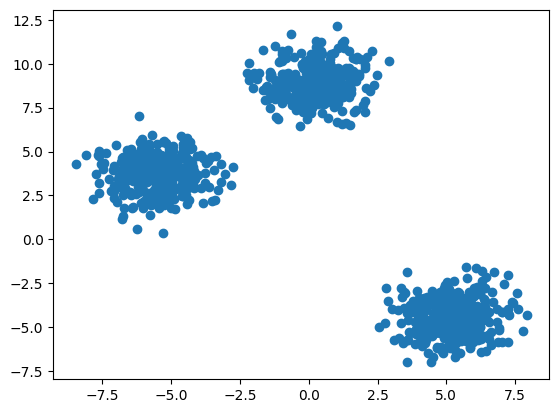

In [74]:
# ploting scatter plot

plt.scatter(X[:,0],X[:,1])

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

# ignore  y_train,y_test

In [76]:
# Applying K-Means
from sklearn.cluster import KMeans

##  We will use elbo method


## Manually select the value of K

In [103]:
wcss = []  # here we will store distance from centroid to all the data points where k=1,2,3,4,5,......,n
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)   # value for k_means are arriving at kmeans.inertia_

In [104]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 1032.4442356162986,
 856.9596749881127,
 758.3170448398159,
 688.8108538064846,
 632.4516742472299,
 553.8948794147061]

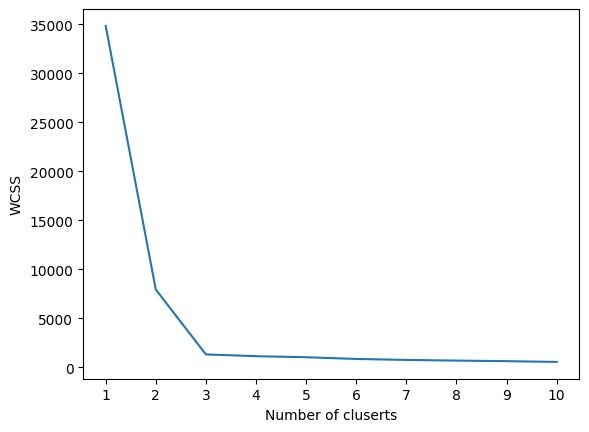

In [105]:
# plot Elbo curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluserts")
plt.ylabel("WCSS")
plt.show()

In [106]:
# we will select 3 because after 3 the graph is becoming comstant

# k = 3 means number of clusters are 3

kmeans = KMeans(n_clusters=3,init="k-means++")

# Making model  I will apply in traing and testing data
y_lables = kmeans.fit_predict(X_train)

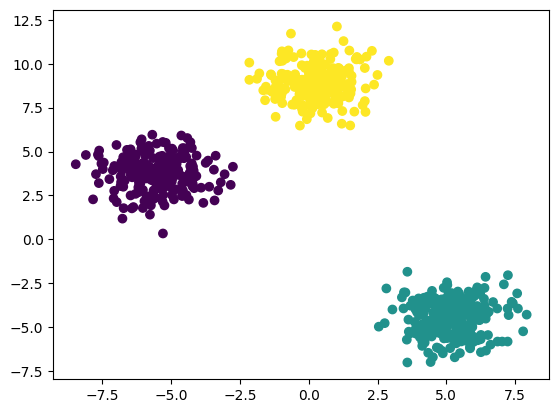

In [107]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_lables)
plt.show()

In [108]:
# fit_predict is only used for X_train data 

y_test_label = kmeans.predict(X_test)
y_test_label

array([2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2,
       2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2,

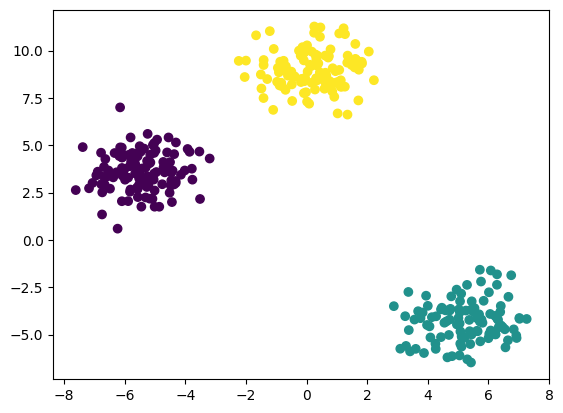

In [123]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)
plt.show()

## To automate value of k we use

In [110]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
from kneed import KneeLocator  # trying to automate value of k

In [112]:
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

# curve = "concave"/"convex"   
#     if in elbo graph value is decreasing then we use convex
#     if in elbo graph value is increasing then we use concave

# direction="decreasing"/"increasing"

print(kl.elbow)  # value of k or number of cluster 

3


In [117]:
# for preformance checking we will use silhouette_score
# compute silhouette_score

silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [120]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6451017410402179),
 np.float64(0.48010580675836323),
 np.float64(0.5053657179732542),
 np.float64(0.33379599469449545),
 np.float64(0.3457463039658347),
 np.float64(0.344803535205129),
 np.float64(0.31617773956022693)]

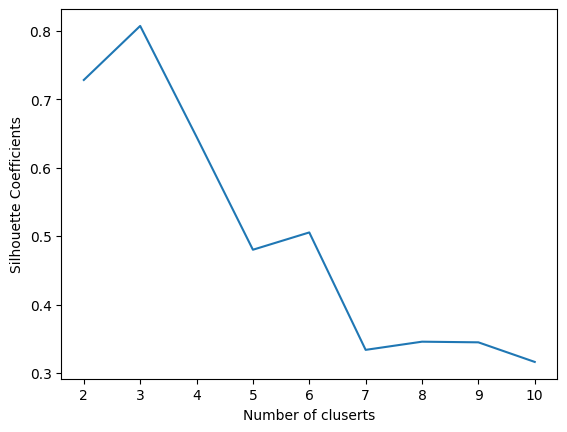

In [122]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of cluserts")
plt.ylabel("Silhouette Coefficients")
plt.show()

# Below 3 has 80% of silhouette score